<a href="https://colab.research.google.com/github/srijonp4/dl/blob/main/cnn_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Import

In [ ]:
''' ! pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle competitions download -c 'Breast Histopathology Images'
!kaggle datasets download -d paultimothymooney/breast-histopathology-images -p /content/My_directory/ --unzip
 '''

" ! pip install -q kaggle\nfrom google.colab import files\nfiles.upload()\n!rm -r ~/.kaggle\n!mkdir ~/.kaggle\n!mv ./kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle datasets list\n! kaggle competitions download -c 'Breast Histopathology Images'\n!kaggle datasets download -d paultimothymooney/breast-histopathology-images -p /content/My_directory/ --unzip\n "

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'breast-histopathology-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7415%2F10564%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240313%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240313T125018Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6ad4b15d32d47d66fb28c7206d96e8eae7515d388504f857ccb553714dba41368f4ec9620d416bc9d08c0401000e4e4dbf790ecfeee735072fb5f2ce07858661e130acfedeb5dcbfd8e1d98c173199f35db1c5942869e6a7329be3740be717e9efe7ac8f04f88709b0ae2d6d518340367150d508b8a5b297e457952462fa6a839a8e1fff797bcd795df35a57fe60a1936232d957377e26904f40669b02ad54a0f7c9ca15f25ca6a4c5482eae08c339c917d6794d03f25e0a6d889c2a123efd51e30a4e3e7967194963e7e9c17d2213fed5d13aa65f03333337e814c074128ab8a8a2a4a02e439037e629493ed889801d1e81e6ae678a33f6b7ed51c9aa8e5a39'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



[==================================================] 3326820824 bytes downloaded
Downloaded and uncompressed: breast-histopathology-images
Data source import complete.


In [ ]:
!pip install pydicom


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install keras-cv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.7 MB/s eta 0:00:00


# Code

In [ ]:
#import necessary liberaries
import pandas as pd                              #for data manipulation and analysis
import numpy as np                               #for numerical operations
import cv2                                       #openCvfor computer vision tasks
import PIL                                       #python imaging library for image processing
import matplotlib.pyplot as plt                  #for creating plots and visualisations
import plotly.express as px                      #interactive plotting library
import seaborn as sns                            #statistical data visualization
import glob                                      #for searching files using patterns
import random                                    #for generating random numbers
import os                                        #for interacting with operating system
import pydicom
import keras.utils as image
%matplotlib inline
import tensorflow as tf
from os import listdir                               #for listing files in directory
from matplotlib.image import imread
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.model_selection  import train_test_split
from tensorflow.keras.models import load_model

from tensorflow.keras import layers
from keras_cv import models as keras_cv_models
import time
from concurrent.futures import ThreadPoolExecutor
# Display some images
import matplotlib.image as mpimg


#set seed for reproducibility
random.seed(100)
np.random.seed(100)


Using TensorFlow backend


In [ ]:
base_directory = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'

# Create an empty list to hold file paths
breast_img = []

# Get all subdirectories in main directory
subdirectories = [f.path for f in os.scandir(base_directory) if f.is_dir()]

# Loop through each subdirectory and add file paths
for subdirectory in subdirectories:
    for root, dirs, files in os.walk(subdirectory):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                breast_img.append(file_path)

# Show first few files
for imgname in breast_img[:3]:
    print(imgname)

../input/breast-histopathology-images/IDC_regular_ps50_idx5/12895/0/12895_idx5_x851_y451_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/12895/0/12895_idx5_x701_y1601_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/12895/0/12895_idx5_x2351_y1001_class0.png


In [ ]:
non_can_img = []   #non-cancerous
can_img = []       #cancerous
#look at the last character, if it is 0, add it to the cancer-free list, if it is 1, add it to the cancer list.
for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)

    elif img[-5] == '1' :
        can_img.append(img)


non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)          # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))
print('Number of Images of cancer : {}' .format(can_num))
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [ ]:
#takes random samples from lists
max_samples = 20000
some_non_img = random.sample(non_can_img, min(len(non_can_img), max_samples))
some_can_img = random.sample(can_img, min(len(can_img), max_samples))

non_img_arr = []
can_img_arr = []



for img in some_non_img: #Processing of cancer-free images .

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    confusion_matrix
for img in some_can_img:

    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])


breast_img_arr = non_img_arr + can_img_arr
random.shuffle(breast_img_arr)



In [ ]:
X = []
y = []


for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)


X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


rate = 0.5
num = int(X.shape[0] * rate)


y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (32000, 50, 50, 3)
X_test shape : (8000, 50, 50, 3)
y_train shape : (32000, 2)
y_test shape : (8000, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


''' model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])
 '''

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])




# model compile
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train model using data
history_cnn = model_cnn.fit(datagen.flow(X_train, y_train, batch_size=75),
                            validation_data=(X_test, y_test),
                            epochs=25,
                            callbacks=[early_stopping])

# result
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss_cnn}, Test Accuracy: {test_accuracy_cnn}')

# save the model to disk
model_cnn.save('model_breastHistoryDataset_Cnn.h5')
print("CNN model saved to disk.")

# load the saved model
loaded_model_cnn = tf.keras.models.load_model('model_breastHistoryDataset_Cnn.h5')
predictions_cnn = loaded_model_cnn.predict(X_test)


Epoch 1/25
427/427 [==============================] - 50s 80ms/step - loss: 0.4564 - accuracy: 0.8050 - val_loss: 2.6227 - val_accuracy: 0.5497
Epoch 2/25
427/427 [==============================] - 34s 79ms/step - loss: 0.4194 - accuracy: 0.8215 - val_loss: 0.5304 - val_accuracy: 0.7538
Epoch 3/25
427/427 [==============================] - 34s 80ms/step - loss: 0.4008 - accuracy: 0.8289 - val_loss: 0.4302 - val_accuracy: 0.8134
Epoch 4/25
427/427 [==============================] - 32s 76ms/step - loss: 0.3935 - accuracy: 0.8345 - val_loss: 0.4816 - val_accuracy: 0.7895
Epoch 5/25
427/427 [==============================] - 33s 76ms/step - loss: 0.3856 - accuracy: 0.8384 - val_loss: 0.6039 - val_accuracy: 0.7406
Epoch 6/25
427/427 [==============================] - 33s 78ms/step - loss: 0.3802 - accuracy: 0.8403 - val_loss: 0.5714 - val_accuracy: 0.7003
Epoch 7/25
427/427 [==============================] - 33s 77ms/step - loss: 0.3750 - accuracy: 0.8416 - val_loss: 0.4269 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 1s 3ms/step


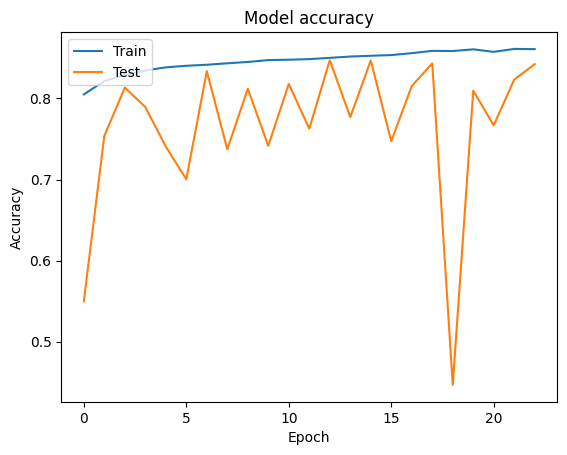

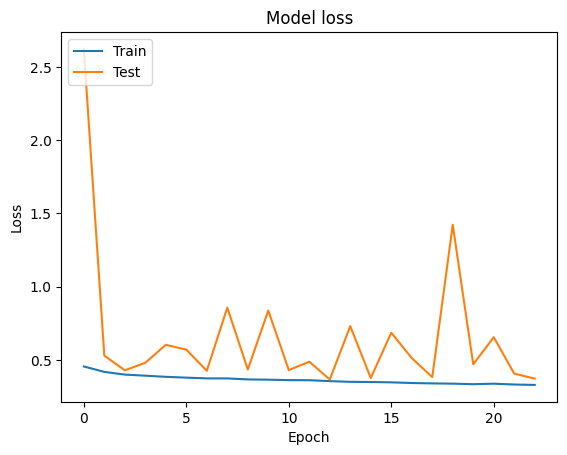

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 18ms/step


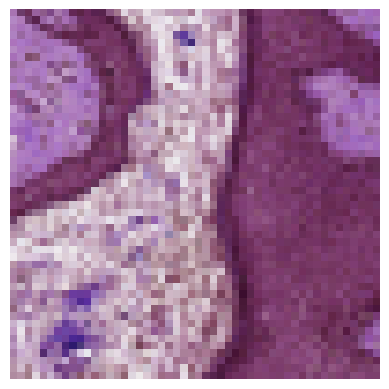

Predicted: Non-Cancerous
Actual: Non-Cancerous


In [ ]:
# single prediction


# Select a random image from the test set
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]
sample_label = y_test[idx]

# Preprocess the image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_image = sample_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction
prediction = loaded_model_cnn.predict(sample_image)
predicted_label = np.argmax(prediction)

# Display the image
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

# Display the predicted and actual labels
print(f"Predicted: {'Cancerous' if predicted_label == 1 else 'Non-Cancerous'}")
print(f"Actual: {'Cancerous' if np.argmax(sample_label) == 1 else 'Non-Cancerous'}")


1/1 [==============================] - 0s 28ms/step


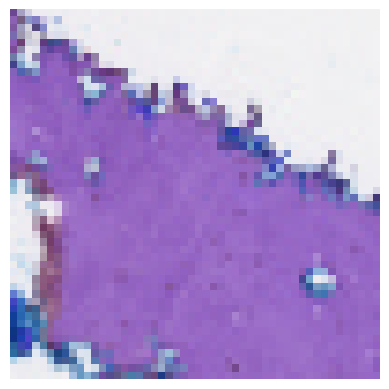

Predicted: Non-Cancerous
Actual: Non-Cancerous


In [ ]:
# predict with a non-cancerous image

# Select a random non-cancerous image from the test set
non_cancerous_indices = np.where(y_test[:, 0] == 1)[0]  # Find indices of non-cancerous images
idx = np.random.choice(non_cancerous_indices)           # Choose a random index from non_cancerous_indices
sample_image = X_test[idx]
sample_label = y_test[idx]

# Preprocess the image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_image = sample_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction
prediction = loaded_model_cnn.predict(sample_image)
predicted_label = np.argmax(prediction)

# Display the image
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

# Display the predicted and actual labels
print(f"Predicted: {'Cancerous' if predicted_label == 1 else 'Non-Cancerous'}")
print(f"Actual: {'Cancerous' if np.argmax(sample_label) == 1 else 'Non-Cancerous'}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Define the model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Adding another convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  # Increasing dense layer size
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),  # Adding another dense layer
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn = model_cnn.fit(datagen.flow(X_train, y_train, batch_size=75),
                            validation_data=(X_test, y_test),
                            epochs=50,
                            callbacks=[early_stopping])

# Evaluate the model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss_cnn}, Test Accuracy: {test_accuracy_cnn}')

# Save the model
model_cnn.save('model_breastHistoryDataset_Cnn_complex.h5')
print("Complex CNN model saved to disk.")


Epoch 1/50
427/427 [==============================] - 34s 71ms/step - loss: 0.6386 - accuracy: 0.6888 - val_loss: 0.5169 - val_accuracy: 0.7567
Epoch 2/50
427/427 [==============================] - 30s 71ms/step - loss: 0.5025 - accuracy: 0.7771 - val_loss: 0.4715 - val_accuracy: 0.7918
Epoch 3/50
427/427 [==============================] - 30s 71ms/step - loss: 0.4757 - accuracy: 0.7878 - val_loss: 0.4715 - val_accuracy: 0.7900
Epoch 4/50
427/427 [==============================] - 31s 73ms/step - loss: 0.4575 - accuracy: 0.7992 - val_loss: 0.4141 - val_accuracy: 0.8148
Epoch 5/50
427/427 [==============================] - 31s 72ms/step - loss: 0.4407 - accuracy: 0.8090 - val_loss: 0.4086 - val_accuracy: 0.8166
Epoch 6/50
427/427 [==============================] - 30s 71ms/step - loss: 0.4292 - accuracy: 0.8141 - val_loss: 0.3964 - val_accuracy: 0.8300
Epoch 7/50
427/427 [==============================] - 31s 73ms/step - loss: 0.4272 - accuracy: 0.8165 - val_loss: 0.4362 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 94ms/step


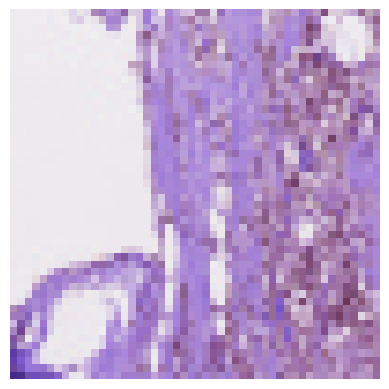

Predicted: Cancerous
Actual: Cancerous


In [ ]:
# single prediction

# Load the model
loaded_model_cnn_complex = tf.keras.models.load_model('model_breastHistoryDataset_Cnn_complex.h5')



# Select a random image from the test set
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]
sample_label = y_test[idx]

# Preprocess the image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_image = sample_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction
prediction_complex = loaded_model_cnn_complex.predict(sample_image)
predicted_label_complex = np.argmax(prediction_complex)

# Display the image
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

# Display the predicted and actual labels
print(f"Predicted: {'Cancerous' if predicted_label_complex == 1 else 'Non-Cancerous'}")
print(f"Actual: {'Cancerous' if np.argmax(sample_label) == 1 else 'Non-Cancerous'}")


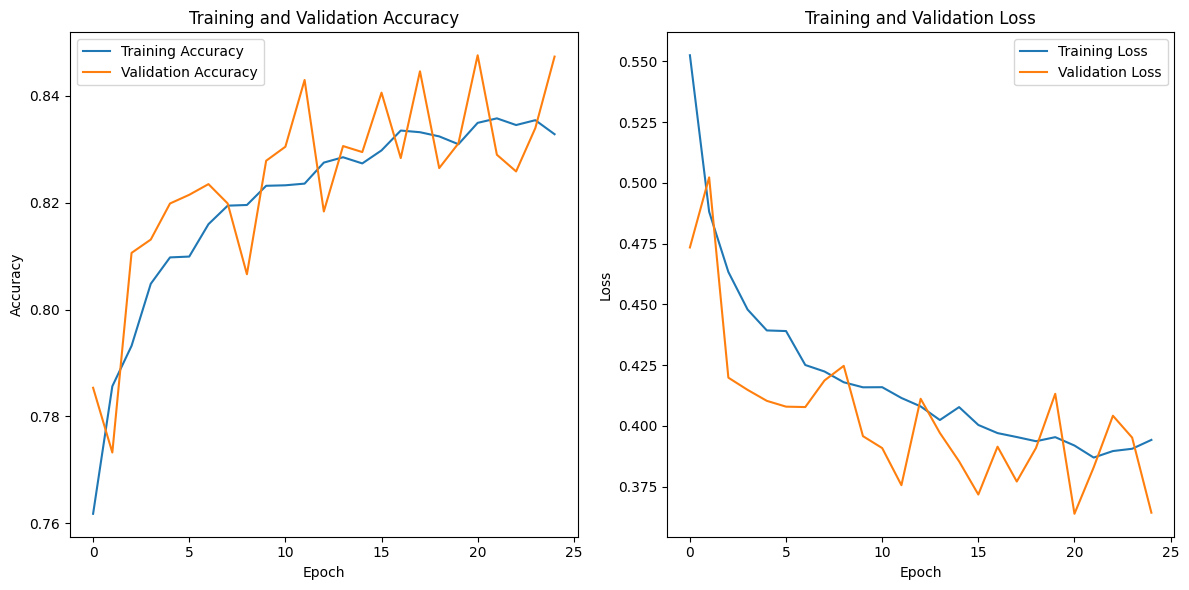

In [ ]:
# Get training and validation accuracy values
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']

# Get training and validation loss values
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
